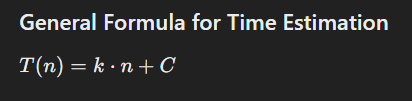

# 8000 contex lengt

In [1]:
import numpy as np

# Coefficients for the equations
A = np.array([[6972, 1], [9866841, 1]])
b = np.array([2.279, 54.57])

# Solve the system of equations
k, C = np.linalg.solve(A, b)
k, C

k_rounded = round(k, 7)
c_rounded = round(C, 6)
print(f"k = {k_rounded}, C = {c_rounded}")

k = 5.3e-06, C = 2.242025


#### k ≈ 0.0000053

#### C ≈ 2.242025

### T(n) = 0.0000053 * n + 2.21356

# 4000 contex lengt

In [2]:
import numpy as np

# Coefficients for the equations
A = np.array([[6972, 1], [102543, 1]])
b = np.array([5.521, 6.74])

# Solve the system of equations
k, C = np.linalg.solve(A, b)
k, C

k_rounded = round(k, 7)
c_rounded = round(C, 6)
print(f"k = {k_rounded}, C = {c_rounded}")

k = 1.28e-05, C = 5.432073


#### k ≈ 0.0000128

#### C ≈ 5.432073

### T(n) = 0.0000128 * n + 5.43207

# 2000 contex lengt




In [3]:
import numpy as np

# Coefficients for the equations
A = np.array([[6972, 1], [102543, 1]])
b = np.array([7.87, 19.32])

# Solve the system of equations
k, C = np.linalg.solve(A, b)
k, C

k_rounded = round(k, 8)
c_rounded = round(C, 6)
print(f"k = {k_rounded}, C = {c_rounded}")

k = 0.00011981, C = 7.034711


#### k ≈ 0.00011981

#### C ≈ 7.034711

### T(n) = 0.00011981 * n + 7.03471

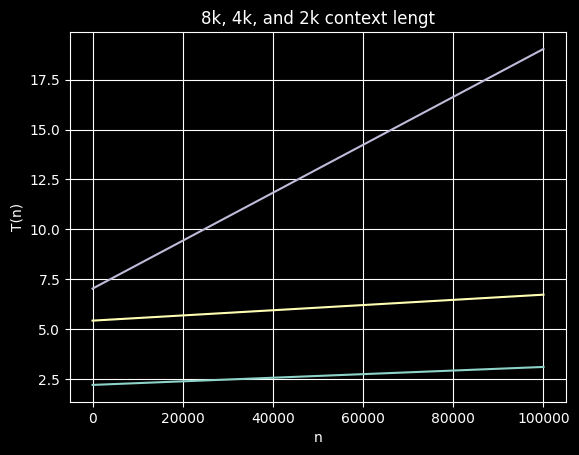

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range of n values
n = np.arange(0, 100000)

# Calculate the corresponding T(n) values
T1 = 0.000009 * n + 2.21356
T2 = 0.000013 * n + 5.43207
T3 = 0.00012 * n + 7.03471
# Plot the formula
plt.plot(n, T1)
plt.plot(n, T2)
plt.plot(n, T3)
plt.xlabel('n')
plt.ylabel('T(n)')
plt.title('8k, 4k, and 2k context lengt')
plt.grid(True)
plt.show()


# calulation for full data set on 8000 context lengt

# T1 = 0.0000053 * 445017078 + 2.21356 

# T1 ≈ 2360.8040734 m

# T1 ≈ 1.64 days

# calulation for full data set on 2000 
### 2000 context lengt as it was the target

# T3 = 0.00011981 * 445017078 + 7.03471

# T3 ≈ 53402.04836 m

# T3 ≈ 37.032 days

### as C looks like i dubels each time we halfs the context size, so c ≈ 2^i * 2.21356 where i is the number of times we half the context size.

### k looks like it also dubels each time half the context lengt, so k ≈ 2^i * 0.0000053 where i is the number of times we half the context size.

### so if we isnted dubel the context size we get c ≈ 0.5^i * 2.21356 where i is the number of times we dubel the context size. and k ≈ 0.5^i * 0.0000053

## full formula for time is T(n,i) = (0.5^i * 0.0000053) * n + 0.5^i * 2.21356 


In [5]:
## start it at 2000 context length
def f(n, i):
    return (0.5**i * 0.00011981) * n + 0.5**i * 7.03471

In [6]:
print(f(445017078, 0))

53324.53082518


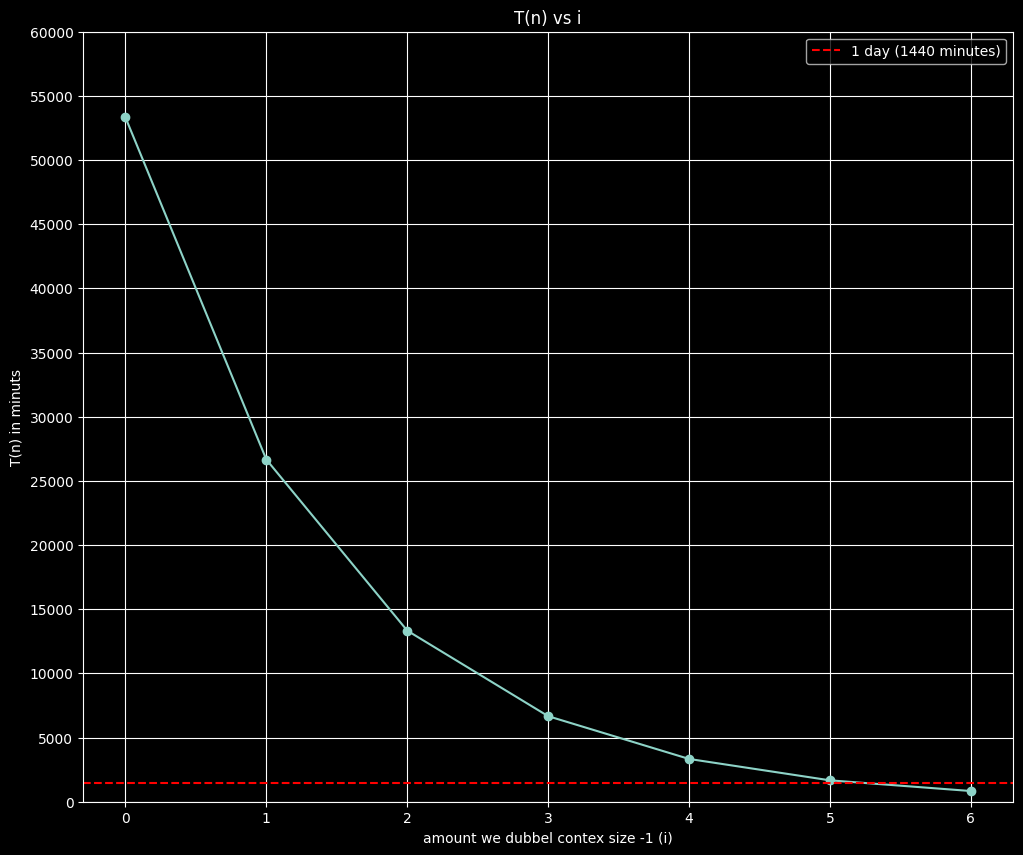

In [7]:
import numpy as np

import matplotlib.pyplot as plt

# Define the range of n values


# Calculate the corresponding T(n) values

i = np.arange(0, 7)

T = f(445017078, i)
plt.figure(figsize=(12,10))
plt.plot(i, T, 'o-')
plt.axhline(y=1440, color='red', linestyle='--', label='1 day (1440 minutes)')
plt.ticklabel_format(useOffset=False)
plt.ylim(0, 60000)
plt.yticks(np.arange(min(T)-833, max(T)+11667, 5000))
plt.xlabel('amount we dubbel contex size -1 (i)')
plt.ylabel('T(n) in minuts')
plt.title('T(n) vs i')
plt.grid(True)
plt.legend()
plt.show()

# 0(i) = 2048, 1(i) = 4096, 2(i) = 8192, 3(i) = 16384
# 4(i) = 32768, 5(i) = 65536, 6(i) = 131072

## 6(i) would be amisning it would mean a theaoretical time to run raptor of only= 13.8833 hours, 
## but it would also mean a max context size of 131072. 
## Our own feasiblity bar is at about a day in compute. 
## ergo 5(i) which is about 27.7 hours. 

## one could argue in worst case for 4(i) which is about 2.3 days.

In [97]:
print(f(445017078, 6))

print(f(445017078, 5))

print(f(445017078, 4))

print(f(445017078, 3))

833.1957941434375
1666.391588286875
3332.78317657375
6665.5663531475


# Calculating vram

### N = max contex lengt 

### V = vram in gb

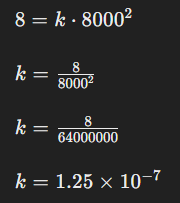

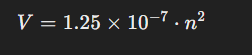

In [98]:
def fv(n):
    return 1.25 * 10**-7 * n**2



print(fv(16384))

33.554432


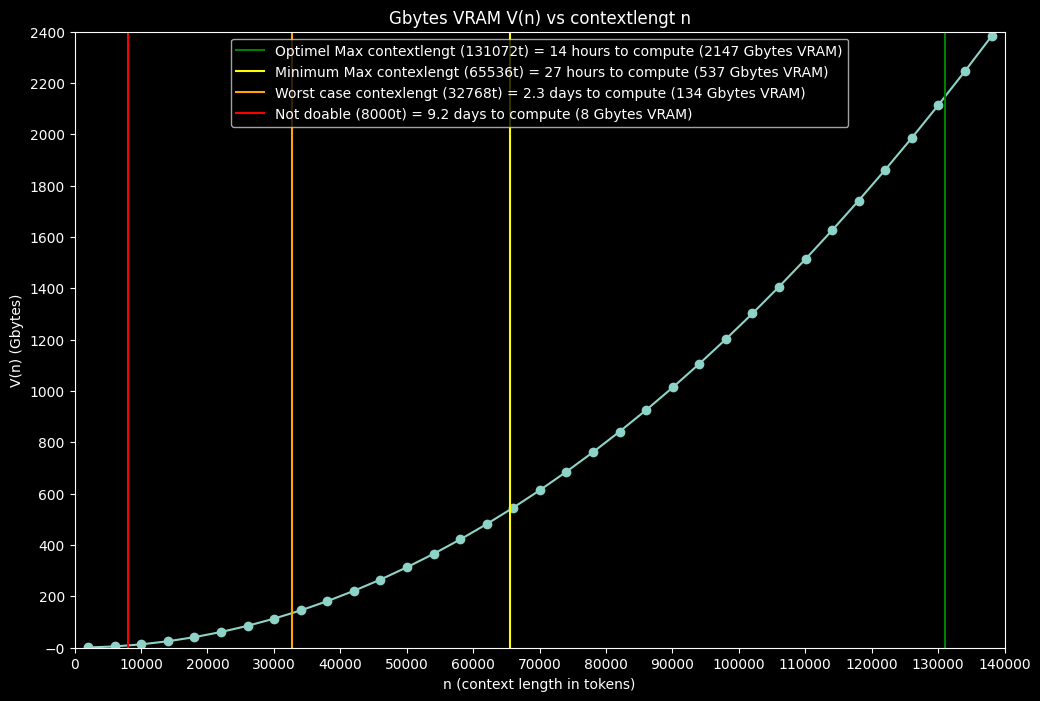

In [105]:
n = np.arange(2048, 140000, 4000, dtype='int64')

V = fv(n)
plt.figure(figsize=(12,8))
plt.plot(n, V, 'o-')
plt.axvline(x=131072, color='green', linestyle='-', label='Optimel Max contextlengt (131072t) = 14 hours to compute (2147 Gbytes VRAM)')
plt.axvline(x=65536, color='yellow', linestyle='-', label='Minimum Max contexlengt (65536t) = 27 hours to compute (537 Gbytes VRAM)')
plt.axvline(x=32768, color='orange', linestyle='-', label='Worst case contexlengt (32768t) = 2.3 days to compute (134 Gbytes VRAM)')
plt.axvline(x=8000, color='red', linestyle='-', label='Not doable (8000t) = 9.2 days to compute (8 Gbytes VRAM)')
plt.ticklabel_format(useOffset=False)
plt.xlim(0, 140000)
plt.ylim(0, 2200)
plt.xticks(np.arange(min(n)-2048, max(n)+7952, 10000))
plt.yticks(np.arange(min(V)-1, max(V)+99, 200))
plt.xlabel('n (context length in tokens)')
plt.ylabel('V(n) (Gbytes)')
plt.title('Gbytes VRAM V(n) vs contextlengt n')
plt.legend()
plt.show()

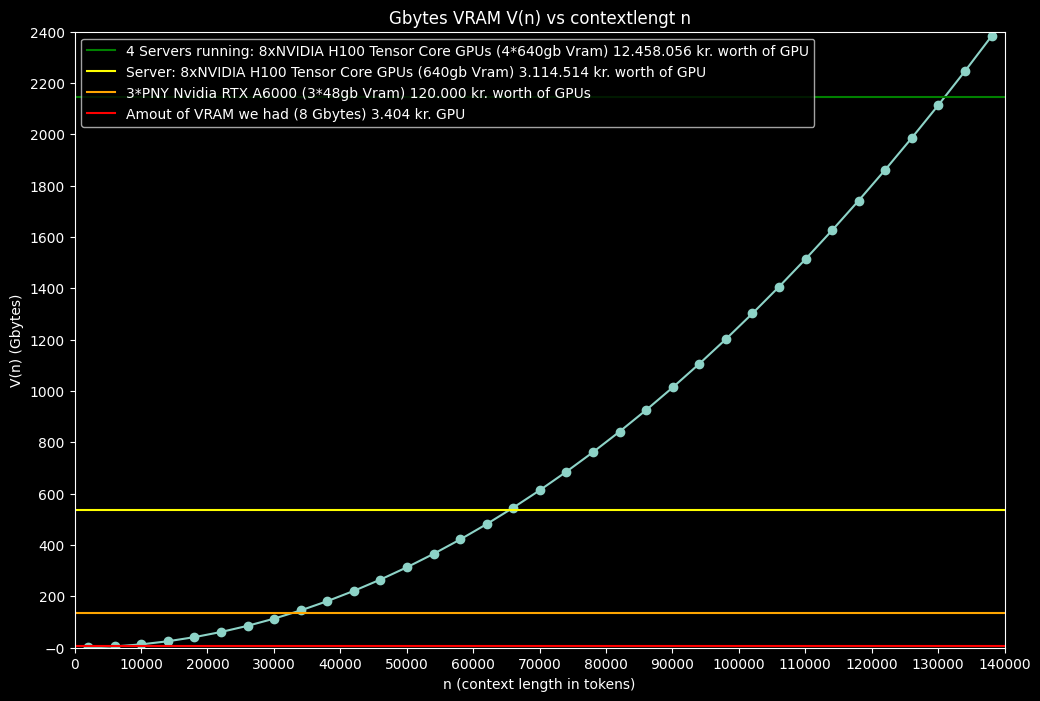

In [104]:


n = np.arange(2048, 140000, 4000, dtype='int64')

V = fv(n)
plt.figure(figsize=(12,8))
plt.plot(n, V, 'o-')
plt.axhline(y=2147, color='green', linestyle='-', label='4 Servers running: 8xNVIDIA H100 Tensor Core GPUs (4*640gb Vram) 12.458.056 kr. worth of GPU')
plt.axhline(y=537, color='yellow', linestyle='-', label='Server: 8xNVIDIA H100 Tensor Core GPUs (640gb Vram) 3.114.514 kr. worth of GPU')
plt.axhline(y=134, color='orange', linestyle='-', label='3*PNY Nvidia RTX A6000 (3*48gb Vram) 120.000 kr. worth of GPUs')
plt.axhline(y=8, color='red', linestyle='-', label='Amout of VRAM we had (8 Gbytes) 3.404 kr. GPU')
plt.ticklabel_format(useOffset=False)
plt.xlim(0, 140000)
plt.ylim(0, 2200)
plt.xticks(np.arange(min(n)-2048, max(n)+7952, 10000))
plt.yticks(np.arange(min(V)-1, max(V)+99, 200))
plt.xlabel('n (context length in tokens)')
plt.ylabel('V(n) (Gbytes)')
plt.title('Gbytes VRAM V(n) vs contextlengt n')
plt.legend()
plt.show()

# open ai cost
# 5 dollers /1m tokens

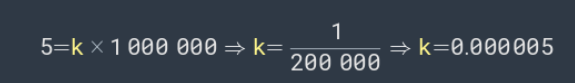

## P(t) = 0.000005 * t
## p is price in dollers
## n is number of tokens
## i is the number of times you want to run it

In [106]:


def fp(t):
    return 0.000005 * t

print(fp(445017078))

2225.08539


# 2225 dolers for 1 raptro run

# 15447.94 kr